## Model Inference

In [1]:
# Import Library

import pickle
import joblib
import json
import pandas as pd
import numpy as np

In [2]:
with open('model.pkl', 'rb') as file_1:
  model = pickle.load(file_1)

with open('full_pipe.pkl','rb') as file_2:
  final_pipe = pickle.load(file_2)

with open('list_num_cols.txt', 'r') as file_3:
  numeric = json.load(file_3)

with open('list_cat_cols.txt','r') as file_4: 
  categoric = json.load(file_4)

## Inferencing

In [3]:
df = pd.read_csv('df_inf.csv')
df


,cab_type,name,price,distance,surge_multiplier,visibility.1
0,Lyft,Shared,7.0,4.51,1.00,9.856
1,Uber,WAV,10.5,2.80,1.00,2.825
2,Lyft,Lyft,7.0,1.09,1.00,4.767
3,Uber,Black,15.5,0.92,1.00,4.503
4,Lyft,Lux Black,16.5,1.12,1.00,10.000
...,...,...,...,...,...,...
95,Lyft,Lyft,9.0,2.96,1.00,2.030
96,Uber,WAV,9.5,2.27,1.00,9.785
97,Lyft,Lux Black,16.5,1.08,1.00,0.717
98,Lyft,Lux,32.5,4.69,1.25,9.933


In [4]:
X_inf = df.drop('price',axis=1)
y_inf = df['price']

In [10]:
final_pipe.fit(X_inf,y_inf)
predicts = final_pipe.predict(X_inf)
predicts

array([12.88006103, 10.09757612,  6.05417455, 16.11542413, 18.73812785,
       18.62435244, 18.39669985, 12.3913004 ,  8.85842369, 31.85348225,
       10.55542538, 18.64153369,  5.14077284,  6.6371727 ,  7.50321203,
        8.70059426, 23.84934766, 13.50709318, 30.89615184, 33.08847747,
       16.92642614,  7.51924794, 13.21047747, 30.96061065,  8.86784103,
       12.02556761,  3.95423088,  4.9525415 , 18.5938516 , 18.82656021,
        4.01066466,  9.95745041, 18.09221655, 33.76718157, 28.18161339,
        7.64738302, 18.70581262, 11.30574103, 23.44795979,  8.63939107,
        6.48731478,  6.87074402, 10.31573135, 15.10373138, 43.17362057,
        9.24815695, 14.84799529, 10.6119341 , 30.00024855, 17.47487596,
       29.94203238, 17.37338842, 16.81342354,  6.2960295 , 11.97912159,
       16.60708138,  8.06250527, 23.1676013 , 28.98456513, 22.55559915,
       29.02575822, 10.00030726, 25.48846411,  8.0332879 , 16.07437465,
       20.39477377, 15.92256974, 19.87315111, 14.37595589, 27.48

Data inf has been predicted

In [12]:
actuals = pd.DataFrame(df['price'])
predicted = round(pd.DataFrame(predicts))

In [13]:
actuals.rename(columns={'price':'actual'},inplace=True)
predicted.rename(columns={0:'predict'},inplace=True)

In [15]:
pd.concat([actuals,predicted],axis=1).head(20)

,actual,predict
0,7.0,13.0
1,10.5,10.0
2,7.0,6.0
3,15.5,16.0
4,16.5,19.0
5,15.0,19.0
6,19.5,18.0
7,11.0,12.0
8,11.0,9.0
9,28.5,32.0


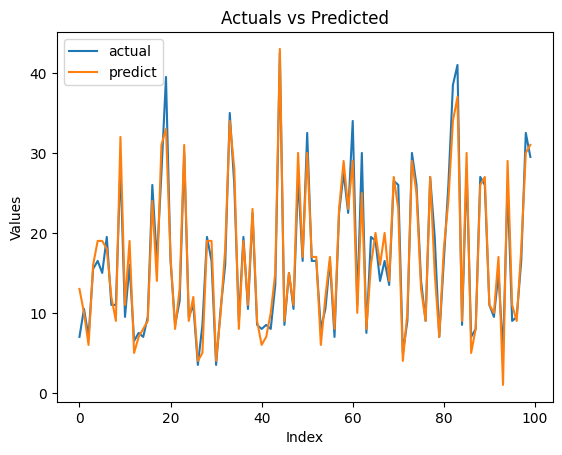

In [17]:
import matplotlib.pyplot as plt

data = pd.concat([actuals, predicted], axis=1)
data.plot(kind='line')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actuals vs Predicted')

plt.show()
